In [118]:
import matplotlib
import seaborn as sn
import numpy as np

### Middle part of the square method

Seed needed to start generator

In [119]:
seed = 9786

Random numbers generator function

In [120]:
def random_numbers_generator(seed):
    random_numbers = []
    
    while seed not in random_numbers:
        random_numbers.append(seed)
        seed = str(seed**2)
        while len(seed) < 8:
            seed = "0" + seed
        seed = int(seed[2:6])
    
    return random_numbers

Plot of the generator

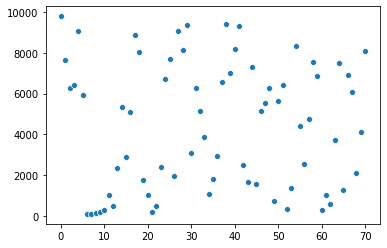

In [121]:
x = np.arange(0,len(random_numbers_generator(seed)))
sn.scatterplot(x, random_numbers_generator(seed))

In [122]:
### General functions and configuration variables for every Linear Congruential Generator

Configure the length of every generated sequence

In [123]:
iterations = 1000

Curried function that returns the following number in the sequence by using the LCG formula

In [124]:
def mixed_congruential_generator(m, a, c):
    def specific_variant(xn):
        return (xn * a + c) % m
    return specific_variant

Function that generates the sequence of pseudo random numbers using an specific LCG 

In [125]:
def generate_random_nums(n_iters, seed, specific_LGC_variant):
    random_nums_list = [seed]
    for i in range(n_iters - 1):
        random_nums_list.append(specific_LGC_variant(random_nums_list[i]))
    return random_nums_list

Function that divide each number by m, so we get numbers ranging from zero to one

In [126]:
def map_sequence_to_uniform_distribution(random_nums):
    return list(map(lambda x: round(x / m, 3), random_nums))

### Specific configurations for each Linear Congruential Generator

Setup the variables required for a custom linear congruential generator and then plot

In [127]:
m = 2 ** 64
a = 18446744073709551557
c = 0
s = 25214903917

In [128]:
mapped_random_nums = map_sequence_to_uniform_distribution(
    generate_random_nums(n_iters=iterations, seed=s,                specific_LGC_variant=mixed_congruential_generator(m, a, c))
)

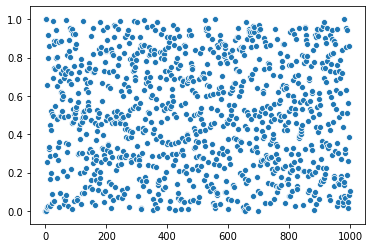

In [129]:
x = np.arange(0, 1000)
sn.scatterplot(x, mapped_random_nums)

